In [1]:
import pandas as pd
from sklearn import datasets

In [28]:
df = pd.read_csv('checkpoint.csv')


# Cleaning

In [8]:
df=df.drop(['Unnamed: 0','uri', 'type', 'uri','track_href','analysis_url','duration_ms','time_signature'], axis=1)
df


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
0,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,463CkQjx2Zk1yXoBuierM9
1,0.762,0.701,8,-3.541,1,0.0286,0.23500,0.000158,0.1230,0.742,110.968,748mdHapucXQri7IAO8yFK
2,0.650,0.825,0,-4.645,1,0.0325,0.02150,0.000024,0.0936,0.593,118.091,37BZB0z9T8Xu7U3e65qxFy
3,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4iJyoBOLtHqaGxP12qzhQI
4,0.634,0.285,9,-14.007,0,0.0807,0.93700,0.000359,0.2320,0.203,129.650,5qNh5WtzMbfpSj2jLlBkoD
...,...,...,...,...,...,...,...,...,...,...,...,...
49200,0.822,0.712,11,-4.877,1,0.1500,0.00682,0.000000,0.0955,0.647,102.874,3hfN1wQSiLPa6b1RX5Kfbj
49201,0.565,0.903,7,-1.918,1,0.0499,0.07460,0.000000,0.3590,0.540,97.968,3IdPtyJHB1WVPM4eCiCAKM
49202,0.616,0.833,3,-3.314,0,0.0670,0.31500,0.000000,0.1750,0.595,97.898,5Z4aqpT39KpY8gbHoJWdou
49203,0.774,0.792,9,-4.019,0,0.2240,0.00427,0.000001,0.2830,0.505,98.100,2ezKXygNO30pXyDQXkm6oD


# Model DF

In [9]:
model_df=df
model_df=model_df.drop(['id'], axis=1)

In [10]:
model_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977
1,0.762,0.701,8,-3.541,1,0.0286,0.23500,0.000158,0.1230,0.742,110.968
2,0.650,0.825,0,-4.645,1,0.0325,0.02150,0.000024,0.0936,0.593,118.091
3,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030
4,0.634,0.285,9,-14.007,0,0.0807,0.93700,0.000359,0.2320,0.203,129.650
...,...,...,...,...,...,...,...,...,...,...,...
49200,0.822,0.712,11,-4.877,1,0.1500,0.00682,0.000000,0.0955,0.647,102.874
49201,0.565,0.903,7,-1.918,1,0.0499,0.07460,0.000000,0.3590,0.540,97.968
49202,0.616,0.833,3,-3.314,0,0.0670,0.31500,0.000000,0.1750,0.595,97.898
49203,0.774,0.792,9,-4.019,0,0.2240,0.00427,0.000001,0.2830,0.505,98.100


In [11]:
X = model_df

y = df['id']

# Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

In [14]:
X_prep_df = pd.DataFrame(X_prep, columns=X.columns)

In [15]:
X_prep_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.676412,1.024924,0.212032,0.928937,-1.327987,-0.221109,-1.103002,-0.527400,-0.750369,1.640039,-0.487936
1,0.991898,0.566619,0.774795,0.965538,0.753019,-0.587052,-0.465527,-0.526915,-0.325429,0.995115,-0.219743
2,0.402991,1.024924,-1.476255,0.801280,0.753019,-0.541745,-1.067290,-0.527325,-0.550128,0.439661,0.019317
3,0.544959,0.548139,-1.476255,0.572748,0.753019,0.463147,-0.223131,-0.527400,1.944485,-0.041235,-0.922460
4,0.318861,-0.970920,1.056176,-0.591637,-1.327987,0.018207,1.513105,-0.526297,0.507637,-1.014212,0.407258
...,...,...,...,...,...,...,...,...,...,...,...
49200,1.307385,0.607275,1.618939,0.766762,0.753019,0.823281,-1.108667,-0.527400,-0.535606,0.640967,-0.491392
49201,-0.043948,1.313212,0.493414,1.207014,0.753019,-0.339605,-0.917625,-0.527400,1.478274,0.242084,-0.656046
49202,0.224215,1.054492,-0.632111,0.999312,-1.327987,-0.140950,-0.240042,-0.527400,0.071997,0.447117,-0.658396
49203,1.054996,0.902956,1.056176,0.894419,-1.327987,1.682957,-1.115854,-0.527397,0.897420,0.111608,-0.651616


# Model

## Inertia with up to 50 clusters

Text(0, 0.5, 'inertia')

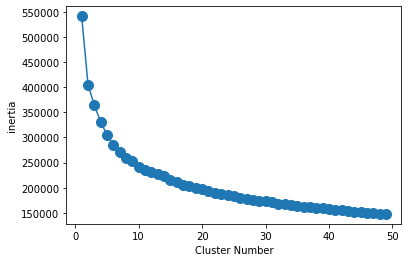

In [27]:
# I want to iterate over a range of n_clusters and for every value, I want to return the inertia
def get_kmeans_inertia_varying_cluster_n(n_clusters):
    
    # setup the model
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=1234,
                    n_init=3,
                    #algorithm='elkan',
                   )
    # train the model
    kmeans.fit(X_prep_df)
    
    # return the resulting inertia
    return kmeans.inertia_

# Plot for a range of cluster numbers
import matplotlib.pyplot as plt

cluster_range = range(1,50)

plt.plot(cluster_range,
         [get_kmeans_inertia_varying_cluster_n(c_number) for c_number in cluster_range],
         marker="o",
         ms=10,
        )
plt.xlabel('Cluster Number')
plt.ylabel('inertia')

## Silhouette

In [29]:
from sklearn.metrics import silhouette_score

K = range(20, 50)

silhouettes = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                   random_state=1234)
    kmeans.fit(X_prep)
    silhouettes.append(silhouette_score(X_prep, kmeans.predict(X_prep)))

Text(0, 0.5, 'silhouette score')

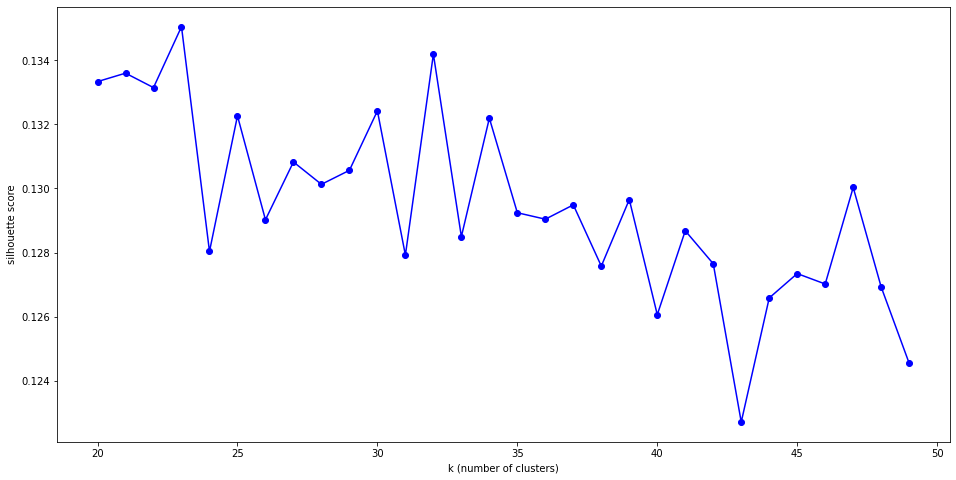

In [30]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')

In [31]:
K = range(2, 19)

silhouettes = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                   random_state=1234)
    kmeans.fit(X_prep)
    silhouettes.append(silhouette_score(X_prep, kmeans.predict(X_prep)))

Text(0, 0.5, 'silhouette score')

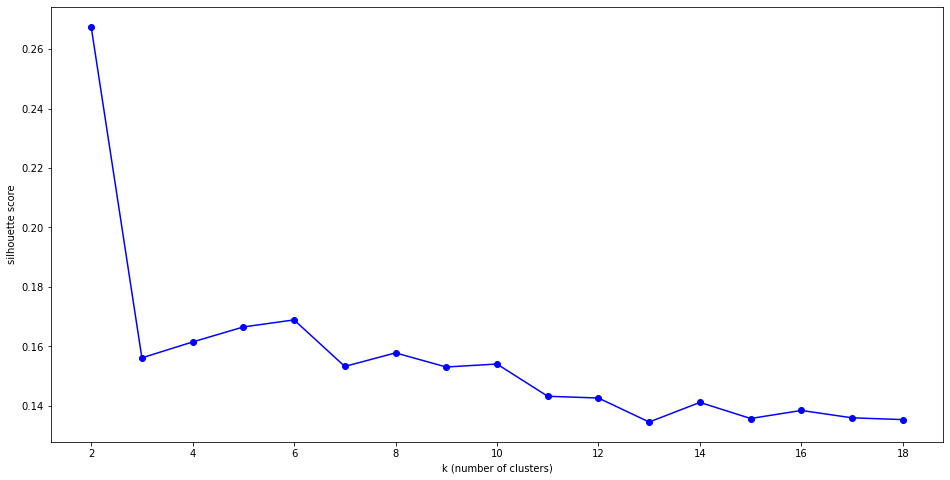

In [32]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=23, random_state=1234)
kmeans.fit(X_prep_df)

KMeans(n_clusters=23, random_state=1234)

In [34]:
kmeans.inertia_

187498.45302730196

In [35]:
clusters = kmeans.predict(X_prep)
clusters

array([ 4, 10,  7, ..., 21, 13, 21], dtype=int32)

In [36]:
pd.Series(clusters).value_counts().sort_index()

0     1383
1     1489
2     1855
3     2902
4     3185
5     2289
6      950
7     3375
8     1865
9     2153
10    4266
11    1250
12    2667
13    1711
14    2420
15    2548
16     108
17    1712
18    1825
19    3026
20    1827
21    3119
22    1280
dtype: int64

In [37]:
kmeans.cluster_centers_

array([[ 5.59722477e-01,  4.59105611e-01, -1.09226461e-01,
         5.11086141e-01, -1.19709257e-01,  2.79235782e+00,
        -5.25722576e-01, -4.59547055e-01, -1.62929411e-02,
         3.52945866e-01,  1.50755474e+00],
       [ 2.64819012e-01,  4.83358375e-01, -1.50985326e-01,
         1.75609909e-01,  7.53019400e-01, -2.07247585e-01,
        -6.24284009e-01,  1.90147860e+00, -1.66146082e-01,
        -1.36816444e-01,  1.76659743e-01],
       [-6.82952830e-01, -7.55878989e-01, -2.79171949e-01,
        -1.72938914e-01,  6.26320193e-01, -4.07586720e-01,
         9.11446704e-01, -4.28666941e-01, -2.27070351e-01,
        -4.39180414e-01,  1.34748593e+00],
       [-1.72644172e-01,  4.50232399e-01, -6.11078047e-01,
         4.99288317e-01,  7.42266697e-01, -3.33793947e-01,
        -7.58345322e-01, -4.43843752e-01, -2.63896988e-01,
        -6.04104291e-01, -2.31760587e-01],
       [ 8.28365569e-01,  6.04356631e-01,  1.11192234e+00,
         4.94758242e-01, -1.32798703e+00, -2.43724255e-02,
  

In [38]:
X_df = pd.DataFrame(X)
X_df['cluster'] = clusters
X_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,4
1,0.762,0.701,8,-3.541,1,0.0286,0.23500,0.000158,0.1230,0.742,110.968,10
2,0.650,0.825,0,-4.645,1,0.0325,0.02150,0.000024,0.0936,0.593,118.091,7
3,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,9
4,0.634,0.285,9,-14.007,0,0.0807,0.93700,0.000359,0.2320,0.203,129.650,14


<AxesSubplot:ylabel='Frequency'>

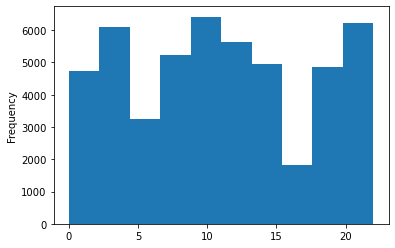

In [39]:
X_df['cluster'].plot(kind='hist')

Text(0, 0.5, 'inertia')

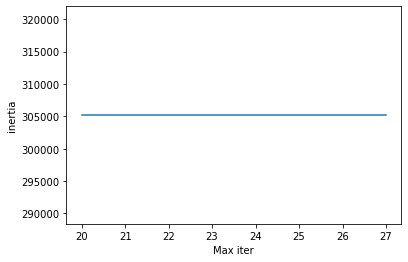

In [41]:
# I want to iterate over a range of mx_iter and for every value, I want to return the inertia
def get_kmeans_ineratia_varying_max_iter(max_iter):
    kmeans = KMeans(n_clusters=5,
                    random_state=1234,
                    n_init=3,
                    algorithm='elkan',
                    max_iter=max_iter,
                   )
    kmeans.fit(X_prep_df)

    return kmeans.inertia_

max_iter_list = [20,21,22,23,24,25,26,27]

plt.plot(max_iter_list,
         [get_kmeans_ineratia_varying_max_iter(x) for x in max_iter_list],
        )
plt.xlabel('Max iter')
plt.ylabel('inertia')

# LEt's visualize the result!


In [44]:
kmeans = KMeans(n_clusters=51,
             random_state=1234)

kmeans.fit(X_prep)

clusters = kmeans.predict(X_prep)
clusters

array([ 8, 10, 45, ...,  8, 46,  8], dtype=int32)

In [98]:
songs_clustered = pd.DataFrame(X_prep, columns = X_prep_df.columns)
songs_clustered

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.308262,-0.543609,-0.418179,0.037824,-1.019804,-0.872238,-0.471022,-0.154221,-0.578537,0.996600,-1.150580
1,0.426811,-0.223828,0.434907,0.805265,0.980581,-0.919262,-0.940429,-0.154154,0.902844,0.633431,-0.791882
2,0.922985,0.221928,0.150545,0.452254,-1.019804,-0.698989,0.845477,-0.154221,-0.451898,-0.722777,-0.654731
3,0.730028,1.471980,-0.986904,1.070023,0.980581,-0.859863,0.527143,-0.153613,-0.825189,-1.193762,-0.737364
4,0.693275,1.539813,-0.133817,0.335379,0.980581,-0.117368,1.741127,-0.153590,0.718775,-0.297189,-0.599166
...,...,...,...,...,...,...,...,...,...,...,...
35644,-0.877944,-1.493261,1.572355,-2.296101,-1.019804,-0.820263,-0.746191,-0.154221,0.218110,-0.450401,-1.041571
35645,-1.796785,1.365387,-0.986904,1.241758,0.980581,1.738870,0.635053,-0.153704,-0.602834,0.729898,-0.932892
35646,-2.155133,0.502947,-1.271266,-0.458299,0.980581,-0.701464,-1.342608,-0.150596,-0.616087,-1.693119,1.357329
35647,-0.106117,-0.427325,-0.702542,0.545873,-1.019804,-0.916787,0.510957,-0.154221,-0.459261,-0.592263,-0.739569


In [99]:
songs_clustered['cluster_id'] = clusters

In [100]:
songs_clustered

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_id
0,-0.308262,-0.543609,-0.418179,0.037824,-1.019804,-0.872238,-0.471022,-0.154221,-0.578537,0.996600,-1.150580,45
1,0.426811,-0.223828,0.434907,0.805265,0.980581,-0.919262,-0.940429,-0.154154,0.902844,0.633431,-0.791882,18
2,0.922985,0.221928,0.150545,0.452254,-1.019804,-0.698989,0.845477,-0.154221,-0.451898,-0.722777,-0.654731,50
3,0.730028,1.471980,-0.986904,1.070023,0.980581,-0.859863,0.527143,-0.153613,-0.825189,-1.193762,-0.737364,29
4,0.693275,1.539813,-0.133817,0.335379,0.980581,-0.117368,1.741127,-0.153590,0.718775,-0.297189,-0.599166,4
...,...,...,...,...,...,...,...,...,...,...,...,...
35644,-0.877944,-1.493261,1.572355,-2.296101,-1.019804,-0.820263,-0.746191,-0.154221,0.218110,-0.450401,-1.041571,15
35645,-1.796785,1.365387,-0.986904,1.241758,0.980581,1.738870,0.635053,-0.153704,-0.602834,0.729898,-0.932892,22
35646,-2.155133,0.502947,-1.271266,-0.458299,0.980581,-0.701464,-1.342608,-0.150596,-0.616087,-1.693119,1.357329,33
35647,-0.106117,-0.427325,-0.702542,0.545873,-1.019804,-0.916787,0.510957,-0.154221,-0.459261,-0.592263,-0.739569,47


In [101]:
songs_clustered['cluster_id'].value_counts()

31    699
6     699
11    699
42    699
10    699
41    699
9     699
40    699
8     699
39    699
7     699
38    699
37    699
12    699
5     699
36    699
4     699
35    699
3     699
34    699
2     699
33    699
1     699
32    699
43    699
44    699
30    699
19    699
29    699
28    699
27    699
26    699
25    699
24    699
23    699
22    699
21    699
20    699
50    699
13    699
18    699
49    699
17    699
48    699
16    699
47    699
15    699
46    699
14    699
45    699
0     699
Name: cluster_id, dtype: int64

In [102]:
kmeans.cluster_centers_

array([[-3.17450662e-01, -6.87823453e-02, -1.33817439e-01,
         2.76871166e-02,  9.80580676e-01,  3.03823634e+00,
         2.08809510e-01, -1.54221210e-01,  1.11636274e+00,
         4.89565858e-02,  1.32224219e+00],
       [ 3.07361425e-01, -2.52898623e-01,  1.50544618e-01,
         3.35975210e-01, -1.01980390e+00, -6.38351622e-01,
        -5.19580996e-01, -1.54221210e-01, -3.85633683e-01,
        -3.02863242e-01, -8.20464630e-01],
       [ 1.18944908e+00,  1.16188962e+00,  1.57235490e+00,
        -3.15186488e-01, -1.01980390e+00,  1.67255501e-01,
        -1.06614365e+00,  7.06573125e+00, -6.01361600e-01,
         9.34180670e-01, -4.76955123e-02],
       [-8.77403363e-02,  1.06498631e+00, -1.27126567e+00,
        -1.94207351e-02,  9.80580676e-01, -5.36877299e-01,
        -1.07369733e+00, -1.54221210e-01,  7.99765452e-01,
        -9.04361658e-01,  1.49489354e+00],
       [ 6.93274772e-01,  1.53981250e+00, -1.33817439e-01,
         3.35378908e-01,  9.80580676e-01, -1.17367599e-01,
  

In [105]:
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_,columns = X_prep_df.columns)

In [108]:
cluster_centers_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_id
0,-0.317451,-0.068782,-0.133817,0.027687,0.980581,3.038236,0.208810,-0.154221,1.116363,0.048957,1.322242,0
1,0.307361,-0.252899,0.150545,0.335975,-1.019804,-0.638352,-0.519581,-0.154221,-0.385634,-0.302863,-0.820465,1
2,1.189449,1.161890,1.572355,-0.315186,-1.019804,0.167256,-1.066144,7.065731,-0.601362,0.934181,-0.047696,2
3,-0.087740,1.064986,-1.271266,-0.019421,0.980581,-0.536877,-1.073697,-0.154221,0.799765,-0.904362,1.494894,3
4,0.693275,1.539813,-0.133817,0.335379,0.980581,-0.117368,1.741127,-0.153590,0.718775,-0.297189,-0.599166,4
5,-1.511944,-2.588268,1.287993,-1.181613,-1.019804,-0.404466,3.338191,-0.152523,-0.573383,-1.250507,1.327810,5
6,0.684086,1.384767,0.719269,1.051538,-1.019804,0.612753,0.322115,-0.154059,-0.223654,0.900134,-0.599772,6
7,0.537072,0.328521,-1.271266,-0.352754,0.980581,-0.203992,1.519912,-0.153321,-0.076399,0.905808,-0.599634,7
8,-1.787597,1.026225,-1.271266,-0.175056,0.980581,-0.043118,-1.022980,-0.154221,0.939657,-0.126953,-0.690728,8
9,0.573825,-0.844009,-0.986904,-1.189365,0.980581,0.699377,-0.957694,-0.154221,-0.400359,0.769620,-0.682680,9


In [107]:
cluster_centers_df['cluster_id'] = range(0,51)

In [117]:
# this contains my cluster centers
cluster_center_sub_df = cluster_centers_df[['energy', 'key', 'cluster_id']]

# this cointains my datapoints with the determined
songs_clustered_sub_df= songs_clustered[['energy', 'key', 'cluster_id']]

In [118]:
cluster_center_sub_df

,energy,key,cluster_id
0,-0.068782,-0.133817,0
1,-0.252899,0.150545,1
2,1.161890,1.572355,2
3,1.064986,-1.271266,3
4,1.539813,-0.133817,4
5,-2.588268,1.287993,5
6,1.384767,0.719269,6
7,0.328521,-1.271266,7
8,1.026225,-1.271266,8
9,-0.844009,-0.986904,9


In [119]:
songs_clustered_sub_df

,energy,key,cluster_id
0,-0.543609,-0.418179,45
1,-0.223828,0.434907,18
2,0.221928,0.150545,50
3,1.471980,-0.986904,29
4,1.539813,-0.133817,4
...,...,...,...
35644,-1.493261,1.572355,15
35645,1.365387,-0.986904,22
35646,0.502947,-1.271266,33
35647,-0.427325,-0.702542,47


<AxesSubplot:xlabel='energy', ylabel='key'>

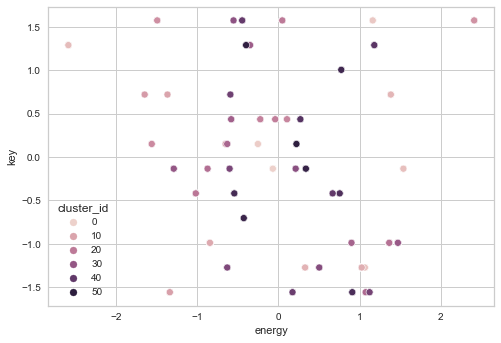

In [121]:
import seaborn as sns

sns.scatterplot(data=songs_clustered_sub_df,
               x='energy',
               y='key',
               hue='cluster_id')



# Predicting

In [130]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np

In [124]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="377ee8a332f04c1e8bdbd3d4f1bef07a",
                                                          client_secret="a450bc9eaf2741aa857d50723b810bf8"))

In [167]:
song_array_df = pd.DataFrame(sp.audio_features(tracks=['10hMM5nsZQf66ldBlgWBfG']))
song_array_df = song_array_df.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'], axis=1)
song_array=song_array_df.values
song_array

array([[ 3.4800e-01,  6.5200e-01,  3.0000e+00, -7.1450e+00,  1.0000e+00,
         9.3100e-02,  1.6500e-02,  2.6400e-04,  3.3000e-01,  1.7200e-01,
         7.0956e+01]])

In [171]:
#scaling
pred_prep = StandardScaler().fit_transform(song_array_df)

In [175]:
pred_prep_df = pd.DataFrame(pred_prep, columns=X_prep_df.columns)
pred_prep_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
KMeans.predict(song_array)

TypeError: predict() missing 1 required positional argument: 'X'